* [前言&資料預處理](#前言&資料預處理)
* [特徵工程&找尋對店家有用的資訊](#特徵工程&找尋對店家有用的資訊)
* [卡方檢定&特色飲料客群的特徵](#卡方檢定&特色飲料客群的特徵)
* [t-test&特色飲料客群的特徵](#t-test&特色飲料客群的特徵)
* [找尋價格最受到哪些因素影響](#找尋價格最受到哪些因素影響)
* [小結](#小結)

 <a name="前言&資料預處理"></a>
## 前言&資料預處理

In [1]:
# 我最近回去看了大學做的專題，覺得過去有些統計內容沒什麼統計意義，像是這個：
# 在性別方面與等待時間做交叉列表和卡方檢定
# 卡方檢定的假設：
# H0：等待時間和性別獨立
# Ha：等待時間和性別不獨立

# 即便顧客願意等待的時間與性別不獨立，假如女姓願意等比較久，店家也不可能由於此便先做男性的餐點，所以我覺得這對店家是沒什麼意義的資訊
# 所以我想以目前所學的專業，再做一次大學專題看看

# 問卷內容: https://docs.google.com/document/d/1iRGezP8tFIvxEyNn64fMnIX6W8hRYuZrAacuYqF3V6I/edit?usp=sharing
# 專題PDF: https://drive.google.com/file/d/1PA3fPIAzuRSKE5UZoWLe27fAYS2VUaWh/view?usp=sharing

In [2]:
import os
import pandas as pd
import numpy as np
import datetime
import glob
from datetime import date
import warnings
warnings.filterwarnings("ignore")  
pd.set_option('display.max_columns', None)
raw=pd.read_excel(r'問卷譯碼本.xlsx',sheet_name='公版')
print(raw.shape)
raw.head(2)

(500, 103)


,流水號,訪員編號,受訪地點,受訪時間,同遊人數(含受訪者),受訪者性別,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,2_1_a,2_1_b,2_1_c,2_1_d,2_1_e,2_2_1,2_2_2,2_2_3,2_2_4,2_2_5,2_2_6,2_2_7,2_2_8,2_2_8_1,2_3,2_4_1,2_4_2,2_4_3,2_4_4,2_4_5,2_4_6,2_4_7,2_4_8,2_4_9,2_4_10,2_4_11,2_4_12,2_4_13,2_4_14,2_4_15,2_4_16,2_4_17,2_4_18,2_4_19,2_4_20,2_4_21,2_4_22,2_4_22_1,2_5,2_6_1,2_6_2,2_6_3,2_6_4,2_6_5,2_6_6,2_6_7,2_6_8,2_6_9,2_6_9_1,2_7,2_8,2_9_1,2_9_2,2_9_3,2_9_4,2_9_5,2_9_6,2_9_7,2_9_8,2_9_9,2_9_10,2_9_10_1,3_1_1,3_1_2,3_1_3,3_1_4,3_1_5,3_1_6,3_2,3_3,3_4,3_4_1,3_5,3_6,3_7_1,3_7_2,3_7_2_9,3_7_2_10,3_8,3_8_1,3_9_1,3_9_2,3_10
0,1,2,1,20181122,1,0,5,5,1,4,4,5.0,4,1,4,4,5,3,5,4,5,4,4,5,4,1,1,0,0,0,0,0,0,888,2,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,888,3,0,0,1,0,0,0,0,0,0,888,2,1,1,0,0,0,0,0,0,0,0,0,888,0,0,1,0,0,0,6,1,1,888,2,1,1,1,888,888,1,888,1,975065,1
1,2,2,1,20181122,5,1,5,5,1,3,3,4.0,3,2,5,4,4,4,4,5,5,5,5,5,5,1,0,0,1,0,0,0,0,888,4,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,0,888,10,0,0,0,0,0,0,0,0,1,清心福全,1,1,1,0,0,1,0,0,0,0,0,0,888,1,0,0,0,0,0,7,1,3,888,5,2,1,6,888,888,3,888,1,933618,1


In [3]:
# 註：999-表該題漏答
# 註：888-表該題不適用
# 註：777-表該題無效
# 先來處以缺失值，以我的理解，999 888 777全都為視為缺失值，不需要特別分類
# 而由於只有500筆問卷資料，所以我傾向於幫缺失值補值，而非刪除有缺失值的列
# 其中欄位1_1到2_1全為受訪者填寫，且全為詢問滿意度的問題，6為最滿意，1為最不滿意
# 大部分的問卷滿意度設為1到5，但是若設1-5，很多人會傾向於全部填3，也就是對方懶的填或者沒意見，那一般來說參考價值便會降低
# 當初設為1到6為了避免都填3(中立、沒意見)的資料

df=raw.copy()
df=df.astype(str)

for i in range(df.shape[1]):
    df[df.columns[i]]=df[df.columns[i]].str.strip()
    df[df.columns[i]]=df[df.columns[i]].str.replace('999','')
    df[df.columns[i]]=df[df.columns[i]].str.replace('888','')
    df[df.columns[i]]=df[df.columns[i]].str.replace('777','')
    df[df.columns[i]]=df[df.columns[i]].str.replace('.0','')
    df[df.columns[i]]=df[df.columns[i]].str.replace('nan','')
df=df.replace('',np.nan)
df['1_6'].value_counts()

5    172
4    144
3     92
6     72
2     10
1      7
Name: 1_6, dtype: int64

In [4]:
# 欄位2_5無法轉換為數字格式，發現包含no，以題目敘述，填寫no表示以上店家都不推薦，因此轉換為空值
# 4. 請勾選您在逢甲商圈曾經嘗試過的飲料店? (可複選) 
# 1.□ 金享 2.□ 緣棧 3.□ 大苑子 4.□ 五十嵐 5.□ 甲文青
# 6.□ 幸福堂 7.□ 珍煮丹 8.□ 茶湯會 9.□ 斜角巷 10.□ 喫茶趣
# 11.□ 蔡大明 12.□ 鮮果匠 13.□ 鮮茶道 14.□ Double A 15.□ 良辰吉時
# 16.□ 清心福全 17.□ 圓石禪飲 18.□ 一芳水果茶 19.□ 手作功夫茶
# 20.□ 可不可熟成紅茶 21.□ 超好喝木瓜牛奶 22. □ 其他____________
# 5. 呈上題，您最推薦的飲料店家是(請填上述 1 個編號) __________

df['2_5'].value_counts()

4     58
3     55
7     34
21    32
18    30
8     29
17    28
22    28
16    26
11    21
1     16
9     16
6     12
13     8
2      6
14     6
19     4
5      4
12     3
15     3
no     2
Name: 2_5, dtype: int64

In [5]:
df['2_5']=df['2_5'].replace('no',np.nan)

In [6]:
# 部分欄位為「其他」的填空題，不適合放在一起統計，所以先刪除
# 如欄位3_4_1為這題4其他的填寫處
# 您目前的居住地(非戶籍地)是哪個縣市？
# 1.□ 台中市 2.□ 彰化縣 3.□ 苗栗、南投、雲林、嘉義地區 4.□ 其他
df['3_4_1'].value_counts()

台北      22
台南       9
高雄       9
新北       8
桃園       7
新竹       5
馬來西亞     3
香港       3
屏東       2
澳門       1
宜蘭       1
日本       1
中壢       1
新加坡      1
Name: 3_4_1, dtype: int64

In [7]:
# 找出空值多於一半的欄位並刪除
df.columns[df.isna().sum() > len(df) / 2]

Index(['2_2_8_1', '2_4_22_1', '2_6_9_1', '2_9_10_1', '3_4_1', '3_7_2',
       '3_7_2_9', '3_7_2_10', '3_8_1', '3_9_2'],
      dtype='object')

In [8]:
dropCols=df.drop(columns=['2_2_8_1', '2_4_22_1', '2_6_9_1', '2_9_10_1', '3_4_1', '3_7_2',
       '3_7_2_9', '3_7_2_10', '3_8_1', '3_9_2'])

# 由於欄位都是類別型資料，所以缺失值都補眾數
# dropCols = dropCols.replace('',(raw.mode().iloc[0]))
dropCols = dropCols.fillna(raw.mode().iloc[0])

for i in range(dropCols.shape[1]):
    dropCols[dropCols.columns[i]]=dropCols[dropCols.columns[i]].str.replace('.0','')
# 確認是否還有缺失值 (false無缺失值)    
dropCols = dropCols.fillna(raw.mode().iloc[0])
dropCols.isna().any().any()
# dropCols['1_6'].value_counts()

False

 <a name="特徵工程&找尋對店家有用的資訊"></a>
## 特徵工程&找尋對店家有用的資訊

In [9]:
# 假設我想在在逢甲商圈開設飲料店，並且想從資料中獲取有用資訊，那我會想先分析以下的問題，看要走加盟店或是特色飲料店
# 3. 您在逢甲商圈偏好在連鎖飲料店或逢甲特色飲料店消費?
# 1.□ 只願意購買特色飲料店 2.□ 偏好特色飲料店 3.□ 都願意
# 4.□ 偏好連鎖飲料店 5.□ 只願意購買連鎖飲料店 6.□ 沒有喝飲料的習慣
dropCols['2_3'].value_counts()

3      232
2      148
4       48
1       29
6       18
5       15
3.0     10
Name: 2_3, dtype: int64

In [10]:
# 發現3.0應該要跟3合併，因此把.0排除掉
dropCols=dropCols.astype(str)
for i in range(dropCols.shape[1]):
    # dropCols[dropCols.columns[i]].str.replace('.0','')
    dropCols[dropCols.columns[i]] = dropCols[dropCols.columns[i]].str.replace('.0','')
dropCols['2_3'].value_counts()

3    242
2    148
4     48
1     29
6     18
5     15
Name: 2_3, dtype: int64

 <a name="卡方檢定&特色飲料客群的特徵"></a>
## 卡方檢定&特色飲料客群的特徵

In [11]:
# 接著來看偏好特色飲料店的客群，他們有什麼特徵，與非偏好特色飲料店客群的區別
sepcial=dropCols[(dropCols['2_3'] == '1') | (dropCols['2_3'] == '2')]
other=dropCols[~(dropCols['2_3'] == '1') & ~(dropCols['2_3'] == '2')]

In [12]:
# 2. 您這次在逢甲商圈會購買下列哪一類型的飲料? (可複選)
#  1.□ 茶類 2.□ 鮮奶類(ex:奶茶、紅茶拿鐵) 
#  3.□ 鮮果類 4.□ 調酒類 5.□ 氣泡飲 
#  6.□ 冰沙 7.□ 咖啡 8.□ 其他____________

#偏好特色飲料店的人較不愛購買茶類(50.85% VS 65.02%)，且有顯著差距(P < 0.05)
from scipy.stats import chisquare
def chi(raw, df, column_name, percent):
    raw['percent'] = raw[column_name] / raw[column_name].sum()
    print(raw)

    df['percent'] = df[column_name] / df[column_name].sum()
    print(df)

    observed_values_normalized = raw[percent].values  * np.sum(df[column_name].values)
    # observed_values_normalized = raw[percent].values  * df[column_name].shape[0]
    expected_values_normalized = df[column_name].values 

    result = chisquare(f_obs=observed_values_normalized, f_exp=expected_values_normalized)
    # result = chisquare(f_obs=raw['2_2_1'], f_exp=df['2_2_1'])
    print("Chi-Square statistic:", result.statistic)
    print("P-value:", result.pvalue)

tea = sepcial['2_2_1'].value_counts().reset_index()
tea2 = other['2_2_1'].value_counts().reset_index()

chi(tea, tea2, '2_2_1', 'percent')

  index  2_2_1   percent
0     1     90  0.508475
1     0     87  0.491525
  index  2_2_1   percent
0     1    210  0.650155
1     0    113  0.349845
Chi-Square statistic: 28.50547545261962
P-value: 9.3433884267113e-08


In [13]:
#偏好特色飲料店的人較愛購買鮮奶類，但無顯著差距
milk = sepcial['2_2_2'].value_counts().reset_index()
milk2 = other['2_2_2'].value_counts().reset_index()
chi(milk, milk2, '2_2_2', 'percent')

  index  2_2_2   percent
0     1    117  0.661017
1     0     60  0.338983
  index  2_2_2   percent
0     1    200  0.619195
1     0    123  0.380805
Chi-Square statistic: 2.3959626006917967
P-value: 0.12164884889301604


In [14]:
#偏好特色飲料店的人較不愛購買鮮果類，且有顯著差距
juice = sepcial['2_2_3'].value_counts().reset_index()
juice2 = other['2_2_3'].value_counts().reset_index()
chi(juice, juice2, '2_2_3', 'percent')

  index  2_2_3   percent
0     0    127  0.717514
1     1     50  0.282486
  index  2_2_3   percent
0     0    203  0.628483
1     1    120  0.371517
Chi-Square statistic: 10.965142255026262
P-value: 0.00092841819416956


In [15]:
#偏好特色飲料店的人較愛購買調酒類，且有顯著差距
alcohol = sepcial['2_2_4'].value_counts().reset_index()
alcohol2 = other['2_2_4'].value_counts().reset_index()
chi(alcohol, alcohol2, '2_2_4', 'percent')

  index  2_2_4   percent
0     0    152  0.858757
1     1     25  0.141243
  index  2_2_4   percent
0     0    299  0.925697
1     1     24  0.074303
Chi-Square statistic: 21.042168016867635
P-value: 4.49285577760626e-06


In [16]:
#偏好特色飲料店的人較愛購買氣泡飲，但無顯著差距
soda = sepcial['2_2_5'].value_counts().reset_index()
soda2 = other['2_2_5'].value_counts().reset_index()
chi(soda, soda2, '2_2_5', 'percent')

  index  2_2_5   percent
0     0    163  0.920904
1     1     14  0.079096
  index  2_2_5   percent
0     0    305  0.944272
1     1     18  0.055728
Chi-Square statistic: 3.3519425108262597
P-value: 0.0671257570717653


In [17]:
#偏好特色飲料店的人較愛購買冰沙，但無顯著差距
ice = sepcial['2_2_6'].value_counts().reset_index()
ice2 = other['2_2_6'].value_counts().reset_index()
chi(ice, ice2, '2_2_6', 'percent')

  index  2_2_6   percent
0     0    153  0.864407
1     1     24  0.135593
  index  2_2_6   percent
0     0    286  0.885449
1     1     37  0.114551
Chi-Square statistic: 1.4100012156605088
P-value: 0.23505619143291318


In [18]:
#偏好特色飲料店的人較愛購買咖啡，但無顯著差距
coffie = sepcial['2_2_7'].value_counts().reset_index()
coffie2 = other['2_2_7'].value_counts().reset_index()
chi(coffie, coffie2, '2_2_7', 'percent')

  index  2_2_7   percent
0     0    160  0.903955
1     1     17  0.096045
  index  2_2_7   percent
0     0    295  0.913313
1     1     28  0.086687
Chi-Square statistic: 0.3572592698732661
P-value: 0.5500323208837616


In [19]:
# 特色飲料客群較喜愛購買調酒類，且有顯著差距
# 特色飲料客群較喜愛購買鮮奶類、氣泡飲、冰沙、咖啡，但無顯著差距

In [20]:
# 找尋特色飲料特群較喜愛哪些行銷手法
specialMarketing=sepcial[['2_9_1', '2_9_2', '2_9_3', '2_9_4', '2_9_5', '2_9_6', '2_9_7', '2_9_8', '2_9_9', '2_9_10']]
otherMarketing=other[['2_9_1', '2_9_2', '2_9_3', '2_9_4', '2_9_5', '2_9_6', '2_9_7', '2_9_8', '2_9_9', '2_9_10']]

for i in range(specialMarketing.shape[1]):
    a=specialMarketing[specialMarketing.columns[i]].value_counts().reset_index()
    a['percent'] = a[a.columns[1]] / a[a.columns[1]].sum()
    b=otherMarketing[otherMarketing.columns[i]].value_counts().reset_index()
    b['percent'] = b[b.columns[1]] / b[a.columns[1]].sum()
    
    observed_values_normalized = a['percent'].values  * otherMarketing.shape[0]
    expected_values_normalized = b[b.columns[1]].values 

    result = chisquare(f_obs=observed_values_normalized, f_exp=expected_values_normalized)

    if result.pvalue < 0.05:
        print(specialMarketing.columns[i],)
        print(a)
        print(b)
        print("Chi-Square statistic:", result.statistic)
        print("P-value:", result.pvalue,'\n')

2_9_2
  index  2_9_2   percent
0     0    135  0.762712
1     1     42  0.237288
  index  2_9_2  percent
0     0    261  0.80805
1     1     62  0.19195
Chi-Square statistic: 4.280492960514399
P-value: 0.03855216565308863 

2_9_4
  index  2_9_4   percent
0     0    166  0.937853
1     1     11  0.062147
  index  2_9_4   percent
0     0    287  0.888545
1     1     36  0.111455
Chi-Square statistic: 7.929791050747909
P-value: 0.004862741215178248 

2_9_6
  index  2_9_6   percent
0     0    128  0.723164
1     1     49  0.276836
  index  2_9_6   percent
0     0    250  0.773994
1     1     73  0.226006
Chi-Square statistic: 4.770724534185801
P-value: 0.028947640785074558 

2_9_9
  index  2_9_9   percent
0     0    170  0.960452
1     1      7  0.039548
  index  2_9_9   percent
0     0    299  0.925697
1     1     24  0.074303
Chi-Square statistic: 5.672431940438074
P-value: 0.017233548479609662 



In [21]:
# 特色飲料客群較喜愛：2_9_2每日限量、2_9_6試飲
# 特色飲料客群較不喜愛：2_9_4會員卡優惠、2_9_9app抽獎優惠
# 沒有顯著差距：2_9_1買一送一、2_9_3自帶環保杯折價、2_9_5打卡優惠、2_9_7一日店長、2_9_8部落客推薦、2_9_10其他

 <a name="t-test&特色飲料客群的特徵"></a>
## t-test&特色飲料客群的特徵

In [22]:
# 1_1認為逢甲商圈的商品具獨特性 6：最高同意～1：最低同意

# 很多問卷題目是像1_1這樣，因為填寫者只能填1到6，所以是類別型資料，但我不認為適合當類別型資料處理，因為若視為類別型資料，假如：
# 第一群：A組所有人都填6，B組所有人都填5
# 第二群：C組所有人都填6，D組所有人都填1
# 這兩群計算的的結果會相同，但是對店家而言完全不同，第一群AB兩組都同意，第二群則C組全都很同意、D組都很不同意

# 因此我想先把資料轉換為連續型資料：
# 6轉為3、5轉為2、4轉為1，3轉為-1、2轉為-2、1轉為-3
# 雖然以統計角度而言，1個非常認同 ≠ 3個認同，但是我認為這樣轉換還是會好過當成類別型資料處理

numeric=[ '1_1', '1_2',
       '1_3', '1_4', '1_5', '1_6', '1_7', '1_8', '1_9', '1_10', '1_11', '1_12',
       '1_13', '1_14', '2_1_a', '2_1_b', '2_1_c', '2_1_d', '2_1_e']
continuous=dropCols.copy()

for i in range(len(continuous[numeric].columns)):
       continuous[continuous[numeric].columns[i]] = continuous[continuous[numeric].columns[i]].replace('3','-2')
       continuous[continuous[numeric].columns[i]] = continuous[continuous[numeric].columns[i]].replace('2','-4')
       continuous[continuous[numeric].columns[i]] = continuous[continuous[numeric].columns[i]].replace('1','-6')
       continuous[continuous[numeric].columns[i]] = continuous[continuous[numeric].columns[i]].replace('6','6')
       continuous[continuous[numeric].columns[i]] = continuous[continuous[numeric].columns[i]].replace('5','4')
       continuous[continuous[numeric].columns[i]] = continuous[continuous[numeric].columns[i]].replace('4','2')



# 2_7您通常在逢甲商圈購買一杯飲料的金額為多少?	1：35元以下；2：36-50元；3：51-65元；4：66-80元；5：81元以上
# 2_8您購買飲料時，願意花多少時間等待? 	1：5分鐘以內；2：6-10分鐘；3：11-15分鐘；4：16-20分鐘；5：21分鐘以上
# 這兩題都是越高對高家越好，所以轉換方式一樣
continuous['2_7'] = continuous['2_7'].replace('1','6')
continuous['2_7'] = continuous['2_7'].replace('2','3')
continuous['2_7'] = continuous['2_7'].replace('3','0')
continuous['2_7'] = continuous['2_7'].replace('4','-3')
continuous['2_7'] = continuous['2_7'].replace('5','-6')

continuous['2_8'] = continuous['2_8'].replace('1','6')
continuous['2_8'] = continuous['2_8'].replace('2','3')
continuous['2_8'] = continuous['2_8'].replace('3','0')
continuous['2_8'] = continuous['2_8'].replace('4','-3')
continuous['2_8'] = continuous['2_8'].replace('5','-6')

# 2_3您在逢甲商圈偏好在連鎖飲料店或逢甲特色飲料店消費?	1：只願意購買特色飲料店；2：偏好特色飲料店；3：都願意；4：偏好連鎖飲料店；5：只願意購買連鎖飲料店；6：沒有喝飲料的習慣
# 我想把這題轉換為越喜愛特色飲料店則分數越高
continuous['2_3'] = continuous['2_3'].replace('1','6')
continuous['2_3'] = continuous['2_3'].replace('2','3')
continuous['2_3'] = continuous['2_3'].replace('3','0')
continuous['2_3'] = continuous['2_3'].replace('4','-3')
continuous['2_3'] = continuous['2_3'].replace('5','-6')
continuous['2_3'] = continuous['2_3'].replace('6','0')

numeric2=[ '1_1', '1_2',
       '1_3', '1_4', '1_5', '1_6', '1_7', '1_8', '1_9', '1_10', '1_11', '1_12',
       '1_13', '1_14', '2_1_a', '2_1_b', '2_1_c', '2_1_d', '2_1_e','2_3','2_7','2_8']

continuous[numeric2] = continuous[numeric2].astype(int)

continuousOnly=continuous[numeric2]

# 接著來看偏好特色飲料店的客群，他們有什麼特徵，與非偏好特色飲料店客群的區別
# x=continuousOnly.drop(columns='2_3')
# y=continuousOnly.
spicialContinuous=continuousOnly[(continuousOnly['2_3'] == 2) | (continuousOnly['2_3'] == 1)]
otherContinuous=continuousOnly[~(continuousOnly['2_3'] == 2) & ~(continuousOnly['2_3'] == 1)]

In [23]:
import scipy.stats as stats

for i in range(spicialContinuous.shape[1]):
    t_statistic, p_value = stats.ttest_ind(spicialContinuous[spicialContinuous.columns[i]], otherContinuous[otherContinuous.columns[i]],equal_var=False)
    if p_value <= 0.05: 
        print(spicialContinuous.columns[i])
        print('特色飲料客群平均值:',spicialContinuous[spicialContinuous.columns[i]].mean())
        print('其他客群平均值:',otherContinuous[otherContinuous.columns[i]].mean())
        print('t_statistic:',t_statistic)
        print('p_value:',p_value,'\n')
        pass
    


# for i in range(spicialContinuous.shape[1]):
#     if p_value[i] <= 0.05: 
#         ttest(spicialContinuous,otherContinuous,spicialContinuous.columns[0])
#     pass
# aa

# ttest(spicialContinuous,otherContinuous,spicialContinuous.columns[0])

In [24]:
# 以下類別特色飲料客群顯著較同意：
# 逢甲商圈的商品較有獨特性(1_1)、商品價格低廉(1_3)
# 在逢甲商圈購買飲料的動機包含：口味的獨特性(2_1_a)、包裝的獨特性(2_1_b)
# 在逢甲商圈通常花較低的價格購買一杯飲料(2_7、約61元)、非特色飲料特群約67元

 <a name="找尋價格最受到哪些因素影響"></a>
## 找尋價格最受到哪些因素影響

In [25]:
import matplotlib.pyplot as plt

# 我發現特色飲料客群在逢甲商圈通常花較低的價格購買一杯飲料，因此想深入探討是哪些因素影響客群購買飲料的價格，把飲料價格設為y，其他項目設為x

continuous['2_3'] = continuous['2_3'].astype(str)
continuous['特色飲料客群'] = np.where(continuous['2_3'] == '1','1',
                          np.where(continuous['2_3'] == '2','1',
                          '0'))
y = continuous['2_7']
x = continuous.drop(columns='2_7')

correlation_matrix = continuous.corr()

correlation_with_target = correlation_matrix['2_7']

print(correlation_with_target[correlation_with_target > 0.1])
print(correlation_with_target[correlation_with_target < -0.1])


2_7    1.000000
2_8    0.125899
Name: 2_7, dtype: float64
1_3     -0.136287
1_7     -0.108981
2_1_d   -0.124914
Name: 2_7, dtype: float64


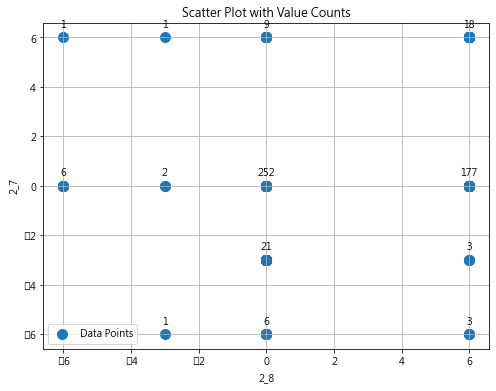

In [26]:
# 飲品購買價格跟其他因素的相關性都相當低，再畫圖比較相關性看看
counts = continuous.groupby(['2_8', '2_7']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(continuous['2_8'], continuous['2_7'], s=100, label='Data Points')  # 's' controls the marker size

# Label points with their value counts
for i, row in counts.iterrows():
    x2, y2, count = row['2_8'], row['2_7'], row['count']
    plt.annotate(f'{count}', (x2, y2), textcoords='offset points', xytext=(0,10), ha='center')

# Optional: Add labels and a title
plt.xlabel('2_8')
plt.ylabel('2_7')
plt.title('Scatter Plot with Value Counts')

# Show the plot
plt.legend()
plt.grid()
plt.show()

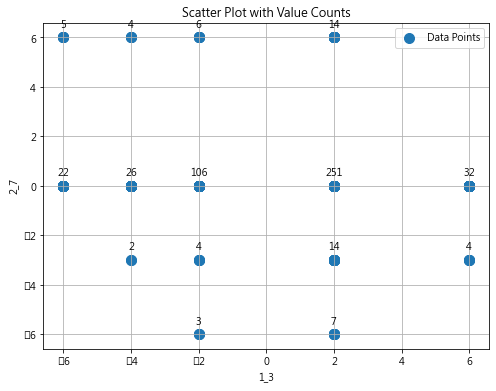

In [27]:
counts = continuous.groupby(['1_3', '2_7']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(continuous['1_3'], continuous['2_7'], s=100, label='Data Points')  # 's' controls the marker size

# Label points with their value counts
for i, row in counts.iterrows():
    x2, y2, count = row['1_3'], row['2_7'], row['count']
    plt.annotate(f'{count}', (x2, y2), textcoords='offset points', xytext=(0,10), ha='center')

# Optional: Add labels and a title
plt.xlabel('1_3')
plt.ylabel('2_7')
plt.title('Scatter Plot with Value Counts')

# Show the plot
plt.legend()
plt.grid()
plt.show()

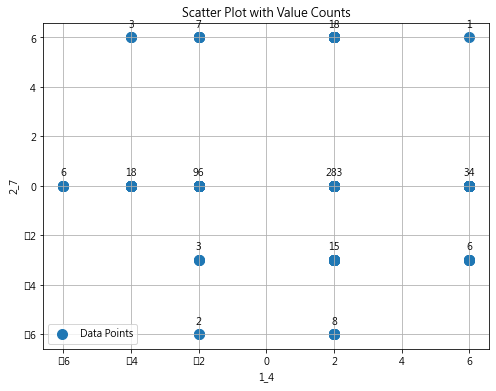

In [28]:
counts = continuous.groupby(['1_4', '2_7']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(continuous['1_4'], continuous['2_7'], s=100, label='Data Points')  # 's' controls the marker size

# Label points with their value counts
for i, row in counts.iterrows():
    x2, y2, count = row['1_4'], row['2_7'], row['count']
    plt.annotate(f'{count}', (x2, y2), textcoords='offset points', xytext=(0,10), ha='center')

# Optional: Add labels and a title
plt.xlabel('1_4')
plt.ylabel('2_7')
plt.title('Scatter Plot with Value Counts')

# Show the plot
plt.legend()
plt.grid()
plt.show()

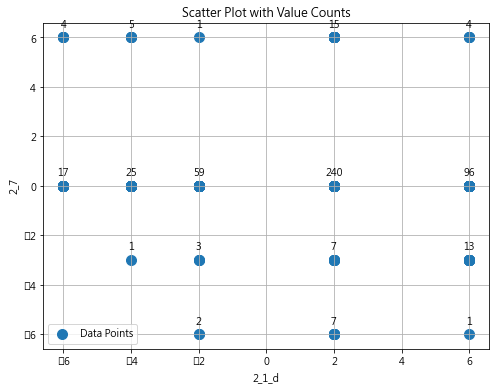

In [29]:
counts = continuous.groupby(['2_1_d', '2_7']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(continuous['2_1_d'], continuous['2_7'], s=100, label='Data Points')  # 's' controls the marker size

# Label points with their value counts
for i, row in counts.iterrows():
    x2, y2, count = row['2_1_d'], row['2_7'], row['count']
    plt.annotate(f'{count}', (x2, y2), textcoords='offset points', xytext=(0,10), ha='center')

# Optional: Add labels and a title
plt.xlabel('2_1_d')
plt.ylabel('2_7')
plt.title('Scatter Plot with Value Counts')

# Show the plot
plt.legend()
plt.grid()
plt.show()

In [30]:
# 以圖表來看，相關性也不高
# 由於連一個高相關性的特徵都沒有，就不繼續做機器學習了
# 不然很容易garbage in garbage out，得出不符合實際情況的結論

 <a name="小結"></a>
## 小結
數據分析有很多需要注重的思考點，這份資料的來源是請路人填問卷，也就是抽樣調查，但填問卷方式蒐集到的資料有時不能代表母體，因為願意填問卷的人通常是比較熱心或是不善常拒絕的人，而願意填問卷與不願意填問卷的群體，很可能在某些方面也有顯著差距，加上這些是107年的資訊，因此很可能不適用於現今情況

若是數據分析的內容更需要精確性，蒐集樣本的方式也需要審慎考慮，像是用抽獎問卷，若有漏填則失去資格等等，讓大部分的群體都願意認真填問卷